In [1]:
# importing pandas,numpy, matplotlib,seaborn,StandardScaler,KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# loading mall customer data
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv"
df = pd.read_csv(url)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# droping irrelevant columns
df.drop(["CustomerID"],axis=1,inplace=True)
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [4]:
# checking for missing values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# converting categorical data to numerical data
df["Gender"] = df["Gender"].map({"Male":0,"Female":1})
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


In [6]:
# selecting features for clustering
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X_scaled = StandardScaler().fit_transform(X)


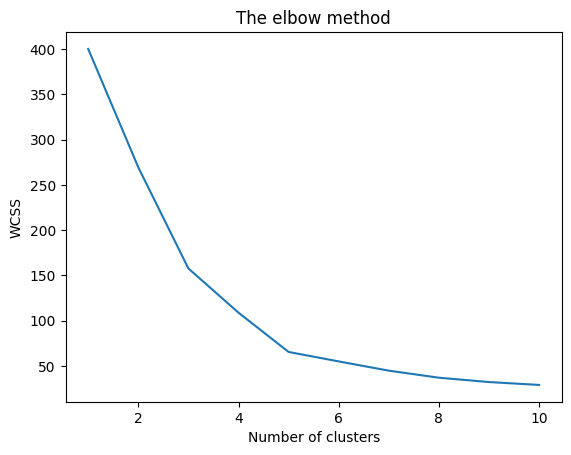

In [7]:
# finding optimal k using elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
# applying k-means clustering
kmeans = KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

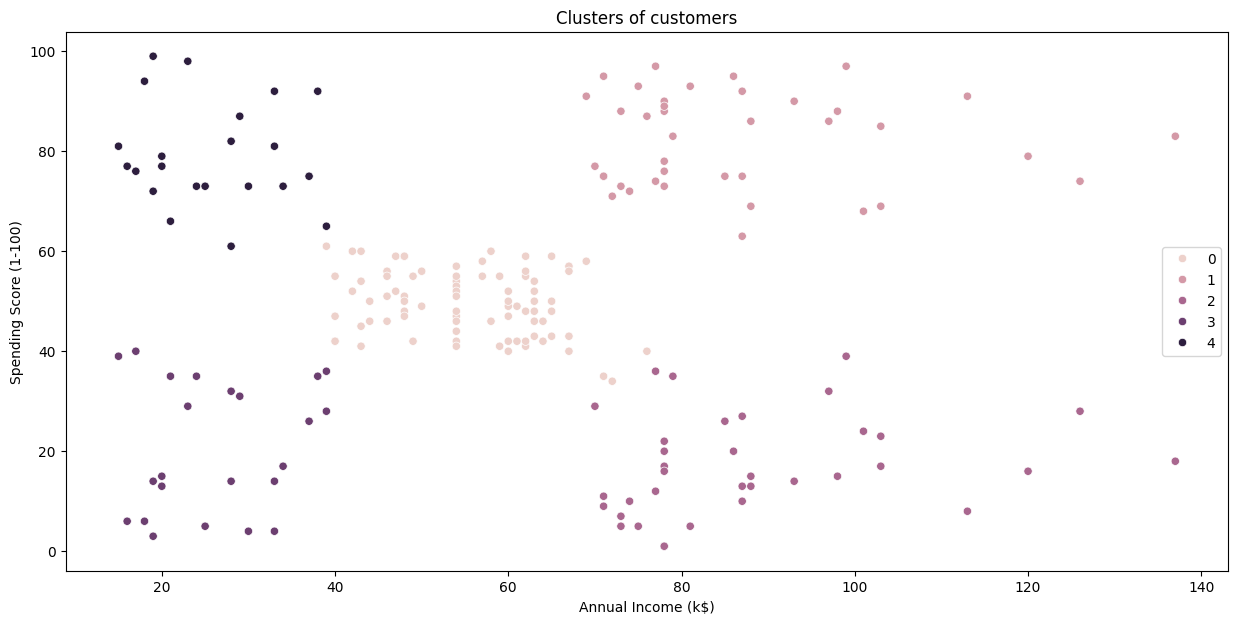

In [9]:
# visualizing clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=df["Annual Income (k$)"],y = df["Spending Score (1-100)"],hue=y_kmeans)
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [10]:
df.groupby(y_kmeans).mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.592593,42.716049,55.296296,49.518519
1,0.538462,32.692308,86.538462,82.128205
2,0.457143,41.114286,88.200000,17.114286
3,0.608696,45.217391,26.304348,20.913043
4,0.590909,25.272727,25.727273,79.363636
